In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName('demo').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/09/28 17:05:35 WARN Utils: Your hostname, deepak-ubuntu, resolves to a loopback address: 127.0.1.1; using 192.168.31.105 instead (on interface wlp1s0)
25/09/28 17:05:35 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/28 17:05:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark

In [ ]:
df = spark.read.format('csv').options(**{'header': 'true', 'inferSchema', 'true'}).load('/home/deepak/programs/python/sparkLearn/data/flight-data/csv')

In [16]:
#Schema is infered Automatically Spark peeks few records and inferes the schema its not recommended in prod environment
df.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: string (nullable = true)



In [17]:
df.show(10)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|    1|
|    United States|            Ireland|  264|
|    United States|              India|   69|
|            Egypt|      United States|   24|
|Equatorial Guinea|      United States|    1|
|    United States|          Singapore|   25|
|    United States|            Grenada|   54|
|       Costa Rica|      United States|  477|
|          Senegal|      United States|   29|
|    United States|   Marshall Islands|   44|
+-----------------+-------------------+-----+
only showing top 10 rows


In [ ]:
df.count() # Action 

1502

In [18]:
# Sort the Df and take 10 records

df.sort('count').take(10) # Action

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Algeria', count='1'),
 Row(DEST_COUNTRY_NAME='Burundi', ORIGIN_COUNTRY_NAME='United States', count='1'),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Brunei', count='1'),
 Row(DEST_COUNTRY_NAME='Hungary', ORIGIN_COUNTRY_NAME='United States', count='1'),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Azerbaijan', count='1'),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Malaysia', count='1'),
 Row(DEST_COUNTRY_NAME='Georgia', ORIGIN_COUNTRY_NAME='United States', count='1'),
 Row(DEST_COUNTRY_NAME='Lithuania', ORIGIN_COUNTRY_NAME='United States', count='1'),
 Row(DEST_COUNTRY_NAME='Djibouti', ORIGIN_COUNTRY_NAME='United States', count='1'),
 Row(DEST_COUNTRY_NAME='Nepal', ORIGIN_COUNTRY_NAME='United States', count='1')]

In [ ]:
df.sort('count').explain() # Spark build up a plan behind the scenes when you call action it executes the plan in RDD

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- Sort [count#654 ASC NULLS FIRST], true, 0
   +- Exchange rangepartitioning(count#654 ASC NULLS FIRST, 200), ENSURE_REQUIREMENTS, [plan_id=2668]
      +- FileScan csv [DEST_COUNTRY_NAME#652,ORIGIN_COUNTRY_NAME#653,count#654] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex(1 paths)[file:/home/deepak/programs/python/sparkLearn/data/flight-data/csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<DEST_COUNTRY_NAME:string,ORIGIN_COUNTRY_NAME:string,count:string>




In [20]:
# after a wide transformation, Spark redistributes the data into N shuffle partitions by default its 200 lets set to 5

spark.conf.set('spark.sql.shuffel.partitions', 5)

In [21]:
df.sort('count').take(5)

[Row(DEST_COUNTRY_NAME='Saint Vincent and the Grenadines', ORIGIN_COUNTRY_NAME='United States', count='1'),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='The Gambia', count='1'),
 Row(DEST_COUNTRY_NAME='Saint Vincent and the Grenadines', ORIGIN_COUNTRY_NAME='United States', count='1'),
 Row(DEST_COUNTRY_NAME='Kyrgyzstan', ORIGIN_COUNTRY_NAME='United States', count='1'),
 Row(DEST_COUNTRY_NAME='Yemen', ORIGIN_COUNTRY_NAME='United States', count='1')]

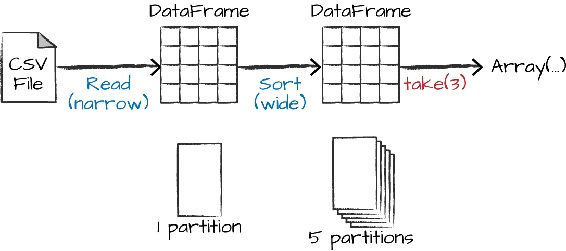

1. The logical plan of transformations that we build up defines a lineage for
the DataFrame so that at any given point in time, Spark knows how to
recompute any partition by performing all of the operations it had before
on the same input data

In [23]:
df.createOrReplaceTempView('vw_flights')

In [26]:
# There is no performance difference between
# writing SQL queries or writing DataFrame code, they both “compile” to
# the same underlying plan that we specify in DataFrame code.

spark.sql("""
select * from vw_flights
""").show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|    1|
|       United States|            Ireland|  264|
|       United States|              India|   69|
|               Egypt|      United States|   24|
|   Equatorial Guinea|      United States|    1|
|       United States|          Singapore|   25|
|       United States|            Grenada|   54|
|          Costa Rica|      United States|  477|
|             Senegal|      United States|   29|
|       United States|   Marshall Islands|   44|
|              Guyana|      United States|   17|
|       United States|       Sint Maarten|   53|
|               Malta|      United States|    1|
|             Bolivia|      United States|   46|
|            Anguilla|      United States|   21|
|Turks and Caicos ...|      United States|  136|
|       United States|        Afghanistan|    2|
|Saint Vincent and..

In [27]:
## Fetch the top 5 dest countries

In [29]:
df.show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|    1|
|       United States|            Ireland|  264|
|       United States|              India|   69|
|               Egypt|      United States|   24|
|   Equatorial Guinea|      United States|    1|
|       United States|          Singapore|   25|
|       United States|            Grenada|   54|
|          Costa Rica|      United States|  477|
|             Senegal|      United States|   29|
|       United States|   Marshall Islands|   44|
|              Guyana|      United States|   17|
|       United States|       Sint Maarten|   53|
|               Malta|      United States|    1|
|             Bolivia|      United States|   46|
|            Anguilla|      United States|   21|
|Turks and Caicos ...|      United States|  136|
|       United States|        Afghanistan|    2|
|Saint Vincent and..

In [32]:
from pyspark.sql.functions import desc

In [33]:
df = spark.read.format('csv').options(**{'header': 'true', 'inferSchema': 'true'}).load('/home/deepak/programs/python/sparkLearn/data/flight-data/csv')

In [36]:
res = (
    df
    .groupBy('DEST_COUNTRY_NAME')
    .sum('count')
    .withColumnRenamed('sum(count)', 'total_count')
    .sort(desc('total_count')).take(5)
)

In [37]:
res

[Row(DEST_COUNTRY_NAME='United States', total_count=2348280),
 Row(DEST_COUNTRY_NAME='Canada', total_count=49052),
 Row(DEST_COUNTRY_NAME='Mexico', total_count=38075),
 Row(DEST_COUNTRY_NAME='United Kingdom', total_count=10946),
 Row(DEST_COUNTRY_NAME='Japan', total_count=9205)]

In [39]:
(
    df
    .groupBy('DEST_COUNTRY_NAME')
    .sum('count')
    .withColumnRenamed('sum(count)', 'total_count')
    .sort(desc('total_count')).limit(5).explain()
)

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- TakeOrderedAndProject(limit=5, orderBy=[total_count#798L DESC NULLS LAST], output=[DEST_COUNTRY_NAME#731,total_count#798L])
   +- HashAggregate(keys=[DEST_COUNTRY_NAME#731], functions=[sum(count#733)])
      +- Exchange hashpartitioning(DEST_COUNTRY_NAME#731, 200), ENSURE_REQUIREMENTS, [plan_id=2906]
         +- HashAggregate(keys=[DEST_COUNTRY_NAME#731], functions=[partial_sum(count#733)])
            +- FileScan csv [DEST_COUNTRY_NAME#731,count#733] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex(1 paths)[file:/home/deepak/programs/python/sparkLearn/data/flight-data/csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<DEST_COUNTRY_NAME:string,count:int>




In [ ]:
# You can also see how our aggregationhappens in two phases, in the partial_sum calls. This is because
# summing a list of numbers is commutative, and Spark can perform the
# sum, partition by partition. Of course we can see how we read in the
# DataFrame

# Naturally, we don’t always need to collect the data. We can also write it
# out to any data source that Spark supports

* This execution plan is a
directed acyclic graph (DAG) of transformations, each resulting in a new 
immutable DataFrame, on which we call an action to generate a result.

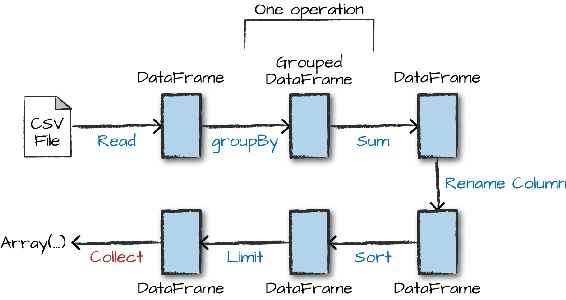